In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Product_data.csv')

In [4]:
print(df.head())

     everyday productid                 productname  quantity
0  2023-08-16   D_10006                CURD - 200 G      60.0
1  2023-08-16   D_10029  STANDARDISED MILK - 500 ml      48.0
2  2023-08-16   D_10006                CURD - 200 G      60.0
3  2023-08-16   D_10017  DOUBLE TONED MILK - 500 ml      72.0
4  2023-08-16   D_10033         TONED MILK - 500 ml      24.0


In [5]:
df.shape

(2516944, 4)

In [6]:
# Filter for product ID D_10006
df_filtered = df[df['productid'] == 'D_30022']

# Group by date and sum quantity
df_grouped = df_filtered.groupby('everyday')['quantity'].sum().reset_index()

#everyday datatype changed into datetime
df_grouped['everyday'] = pd.to_datetime(df_grouped['everyday'])

In [7]:
# Set 'date' column as the index
df_grouped.set_index('everyday', inplace=True)

In [8]:
df_filtered.head()

,everyday,productid,productname,quantity
266191,2022-10-24,D_30022,PURE COW GHEE PET JAR - 100 ml,10.0


In [9]:
print(df_grouped)

            quantity
everyday            
2022-10-24      10.0


In [10]:
df_grouped.shape

(1, 1)

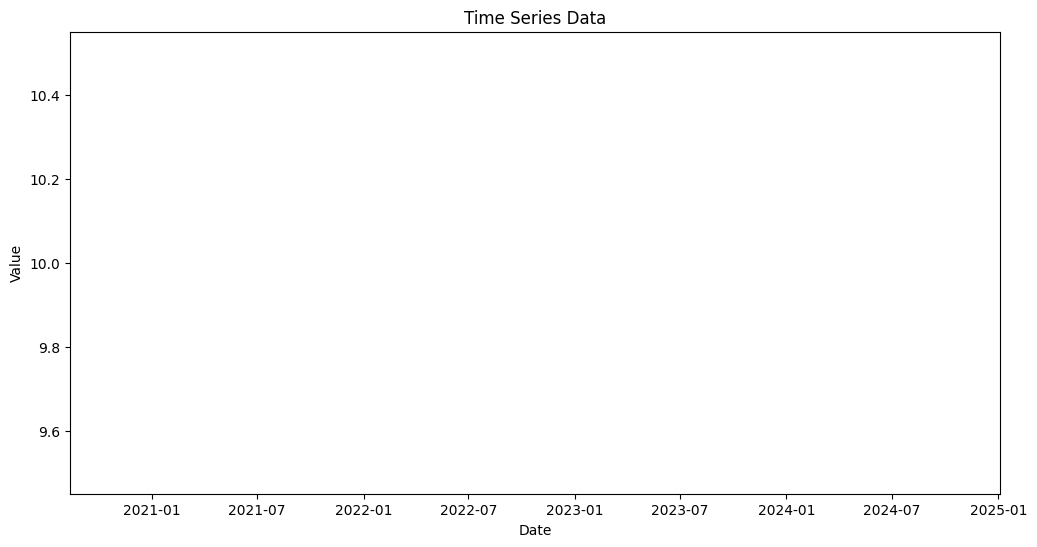

In [11]:
# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['quantity'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()